<h1 style = 'color: green'>Linear Regression Assignment</h1>

<b>By: Raj Kansara</b>

In [234]:
import warnings
warnings.filterwarnings('ignore')

### Importing all libraries

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Understanding the Dataset

### Loading the Dataset

In [236]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [237]:
data.shape

(730, 16)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [239]:
#Checking for null values in data
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As you can see there no null values so we can move forward with Data Preparation Steps for the modelling.

In [240]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


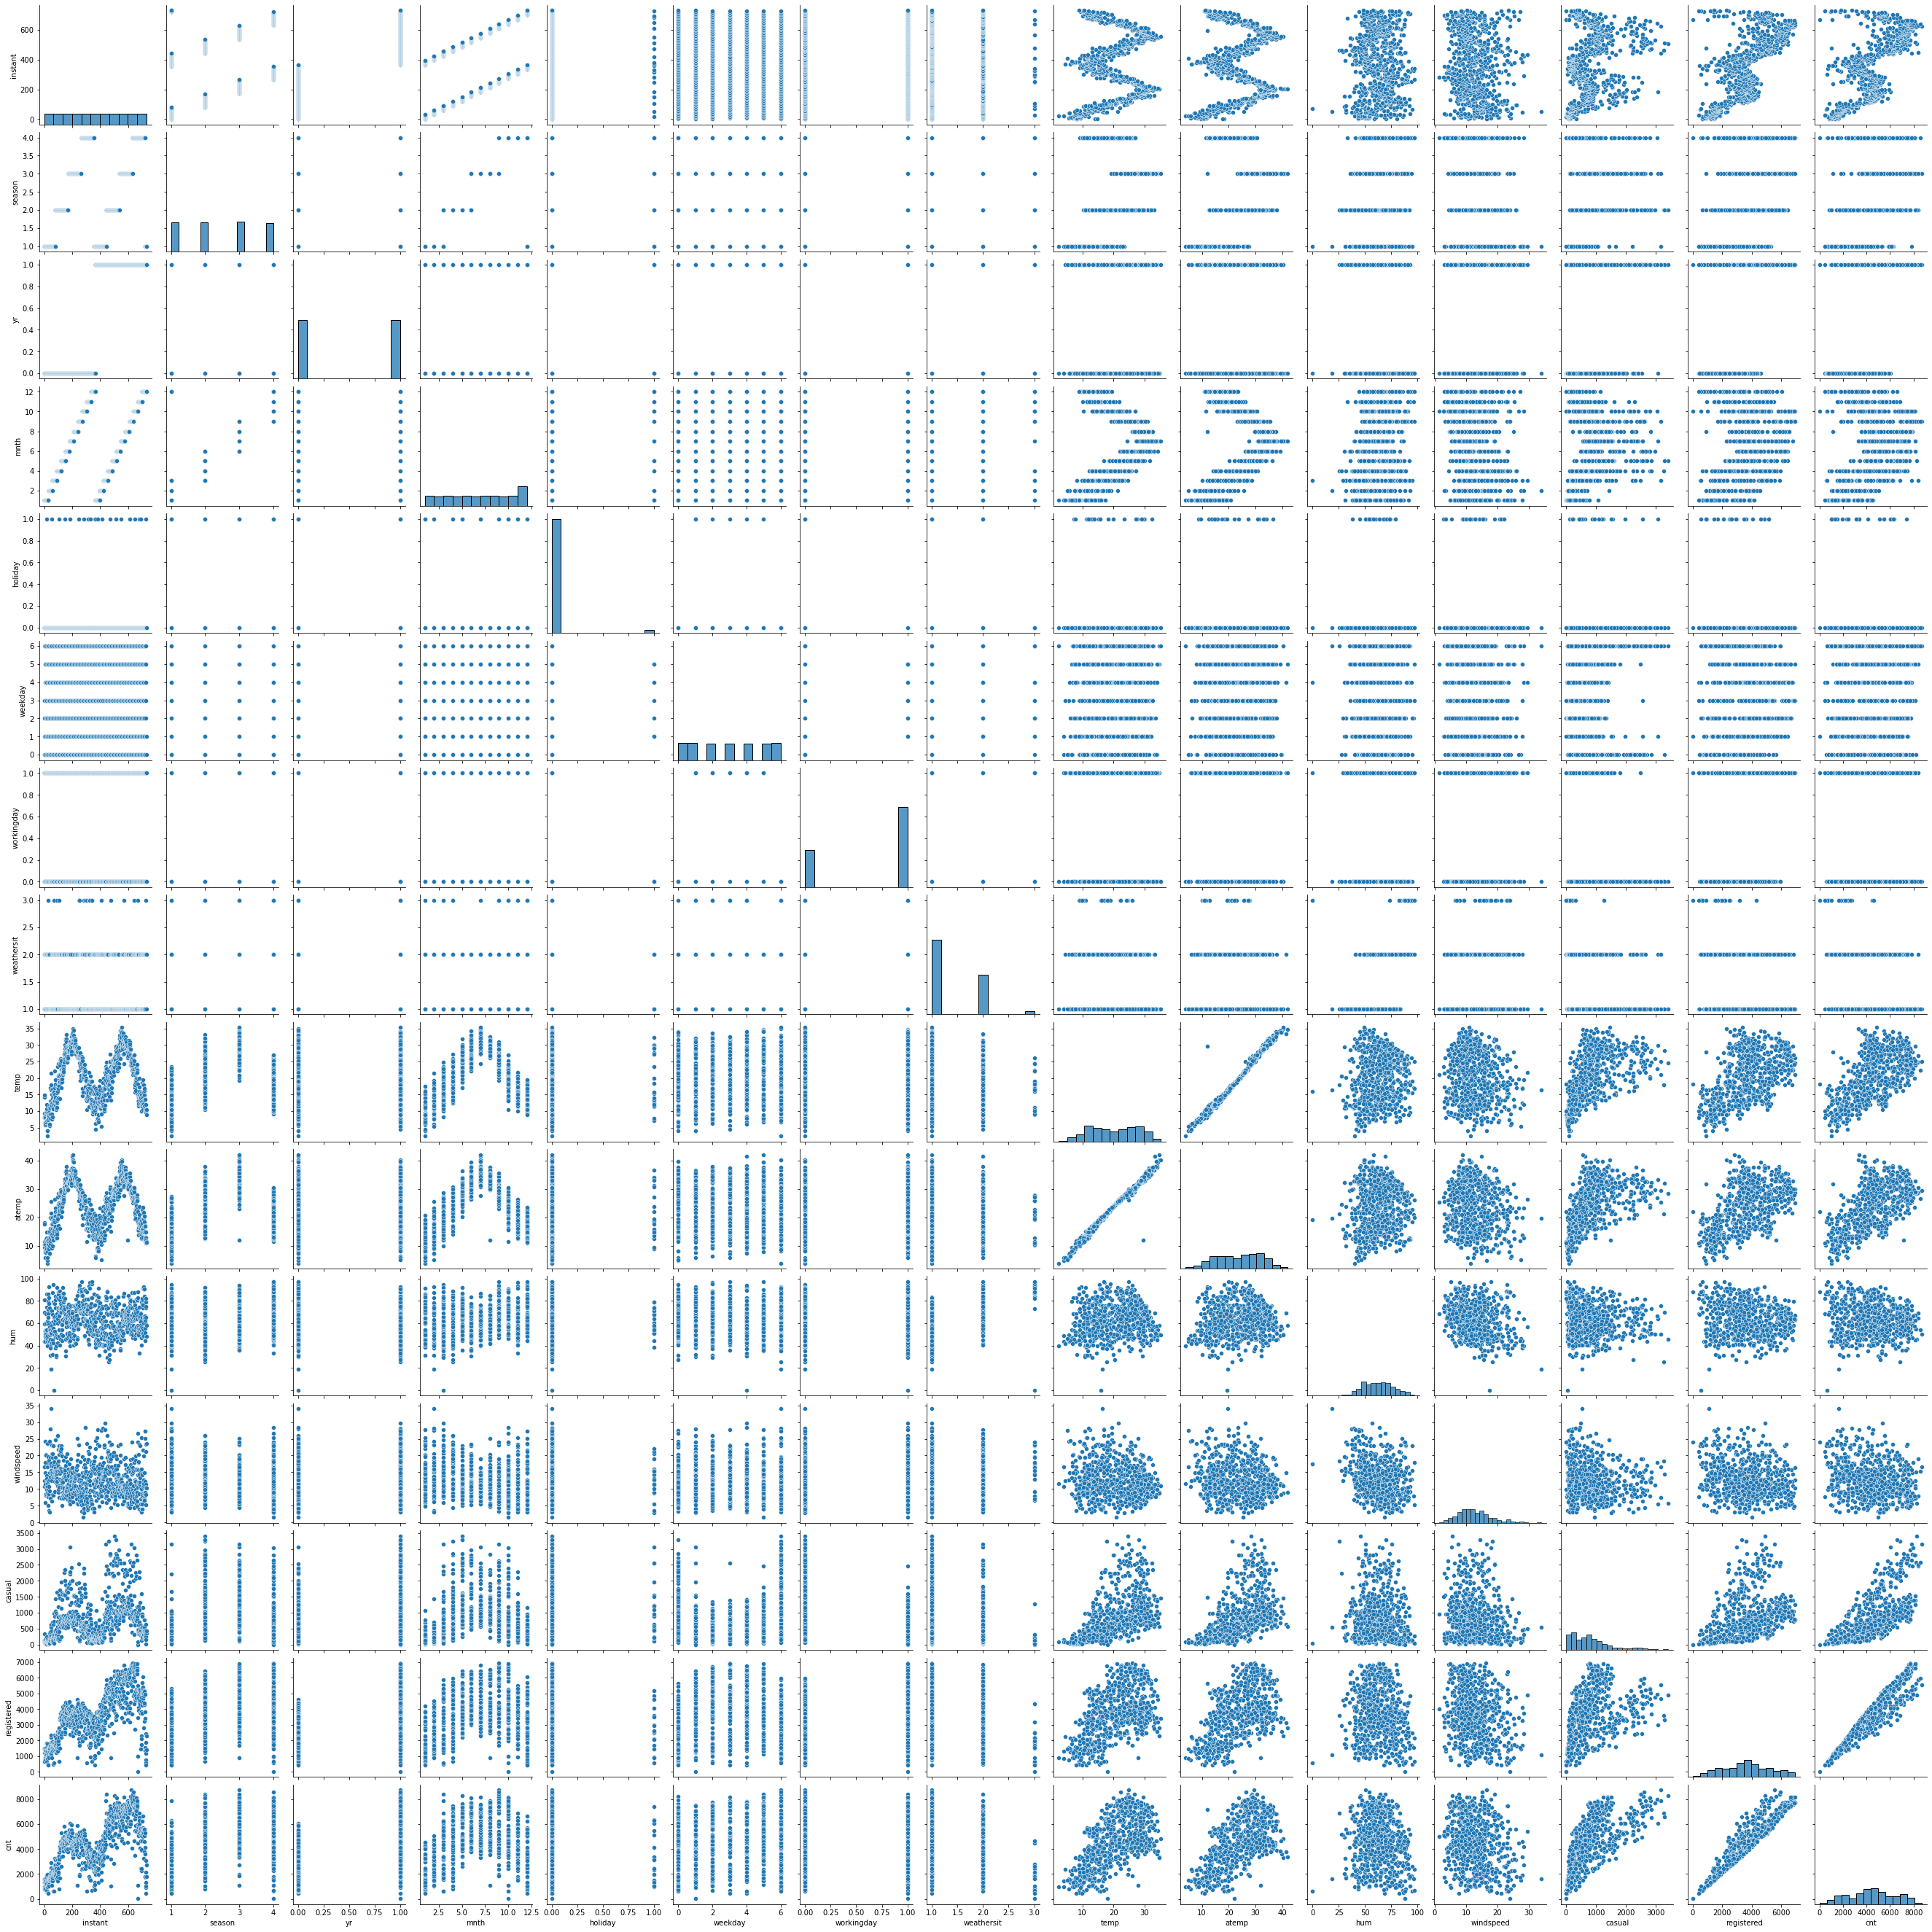

In [241]:
#Plot to get an idea of different varaibles and their relationship with other variables
sns.pairplot(data)
plt.show()

# Data Pre-Processing

### Mapping categorical data to corresponding strings for better understanding

In [242]:
data['season'].replace([1,2,3,4],['Spring', 'Summer', 'Fall', 'Winter'], inplace=True)
data['weathersit'].replace([1,2,3,4],['Clear/Partly Cloudy', 'Mist + Cloudy', 'Light Snow/Rain + Thunderstorm', 'Heavy Rain/Snow + Fog'], inplace=True)
#data['yr'].replace([0,1],[2018, 2019], inplace=True)
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])
data['weekday'].replace([0,1,2,3,4,5,6],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Monday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Making a list of Numerical Variable

In [243]:
data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [244]:
#Renaming some columns for better understanding
data.rename(columns = {'yr':'Year','mnth':'Month','hum':'Humidity','cnt':'Count'}, inplace = True) 

# if number of unique variable are < 20 they are categorical variables
# instant is the index and dteday is date column

num_var = ['temp','Humidity','casual', 'windspeed', 'registered', 'atemp', 'Count']

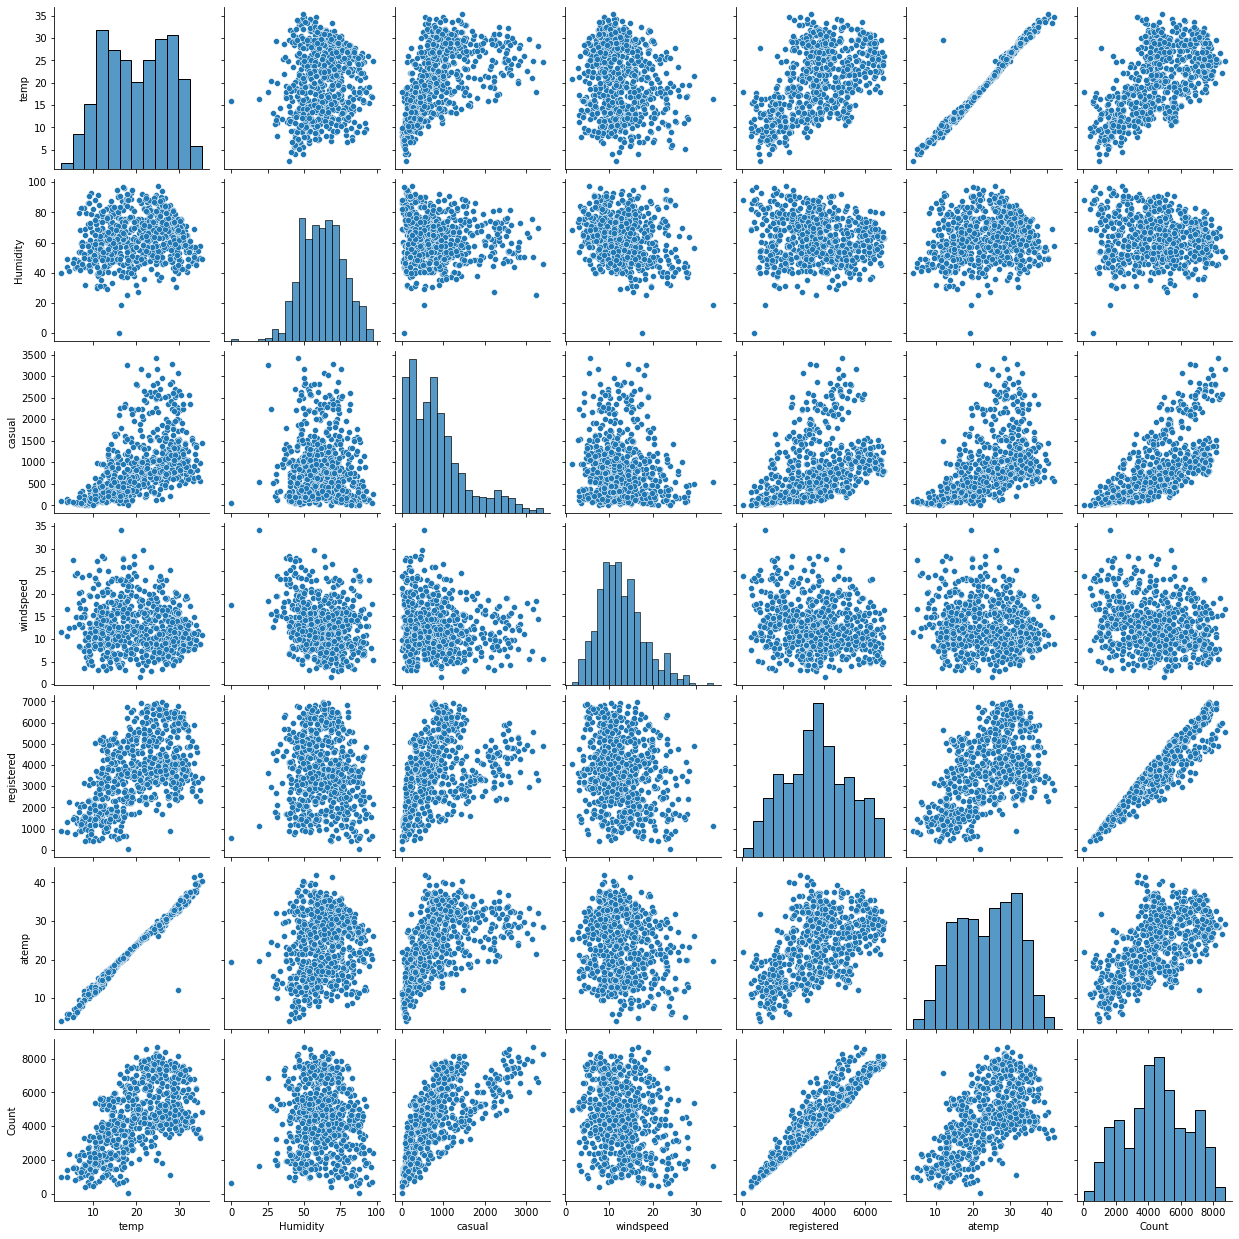

In [245]:
#Pairplot for numerical variables

sns.pairplot(data, vars=num_var)
plt.show()

As observed from the above graphs, there are independent variables such as temp and atemp positively correlated to the variable Count.

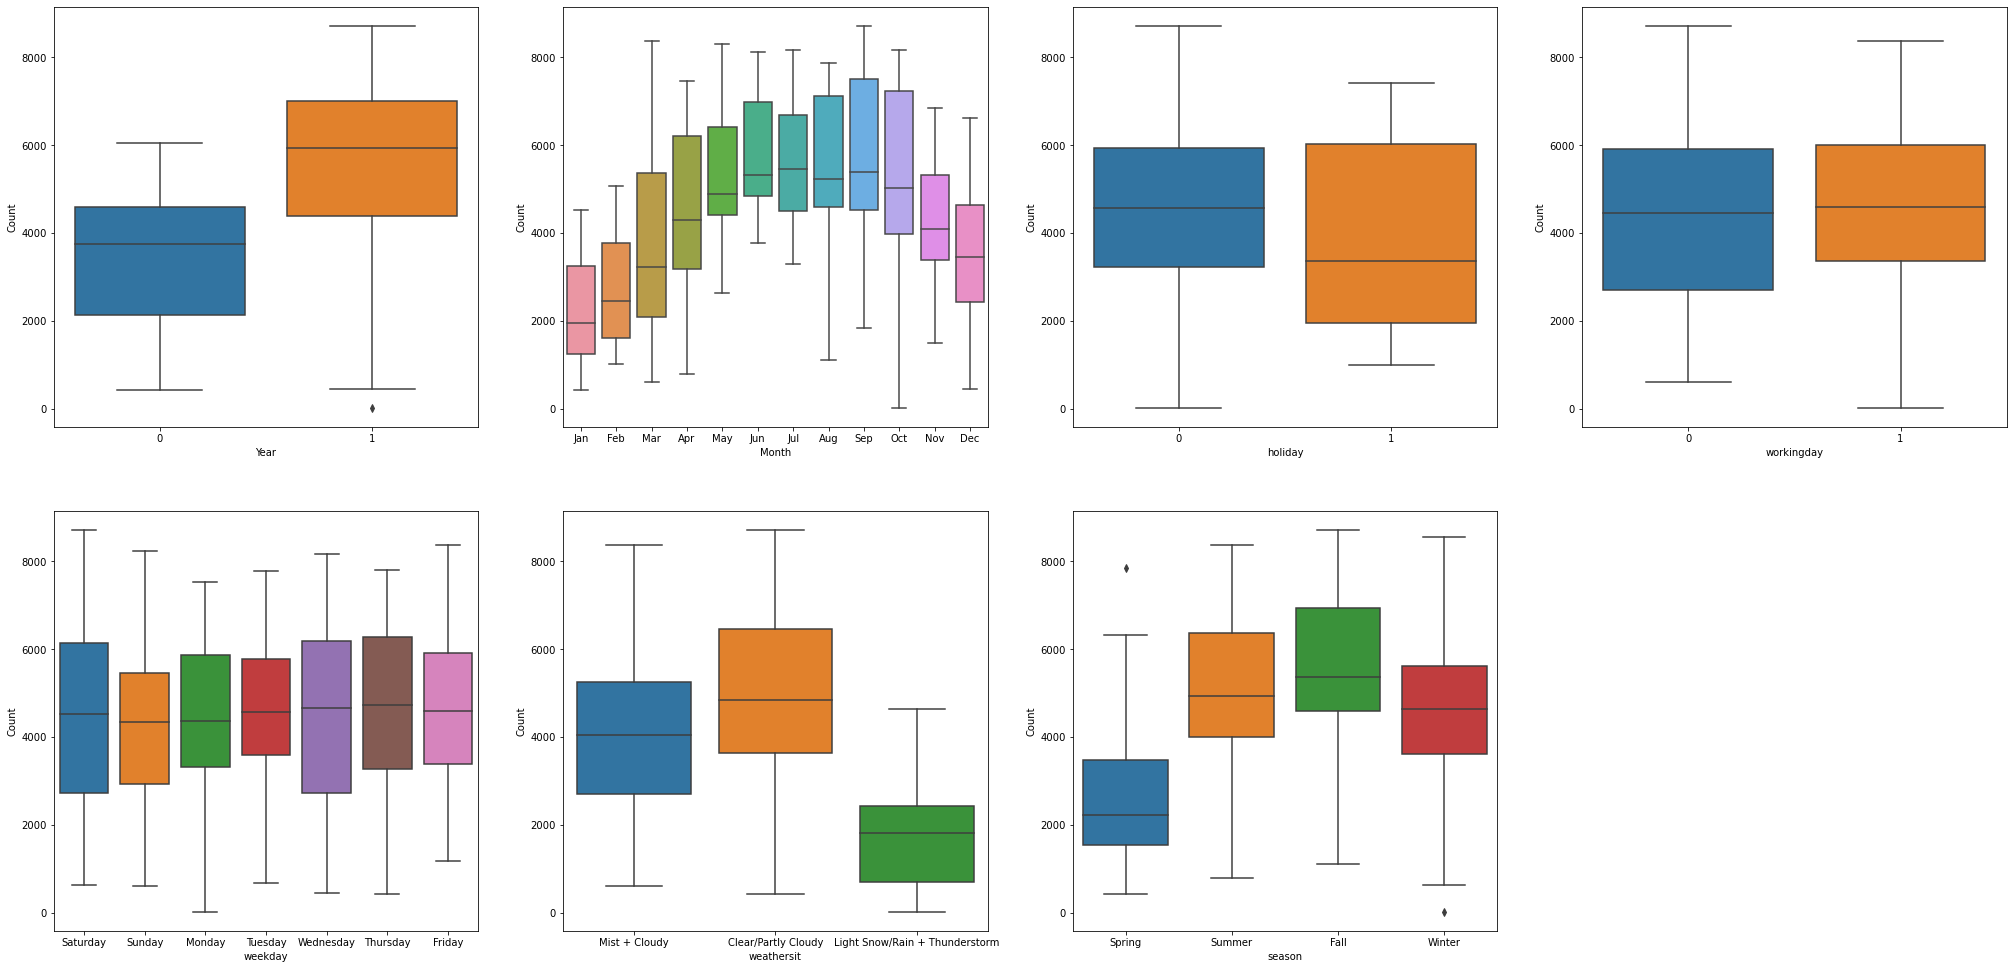

In [246]:
#Boxplot for categorical variables
plt.figure(figsize=(35, 17))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'Count', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'Month', y = 'Count', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'Count', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'Count', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'Count', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'Count', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'season', y = 'Count', data = data)
plt.show()

As observed from the above graphs, following can be deduced <br/>
    1. Bike sharing is more in the year 2019 than 2018. <br/>
    2. Bike sharing is more the season of Fall. <br/>
    3. Bike sharing is more during Clear/Partly Cloudy Weather. <br/>
    4. Bike sharing more on Wednesday, Thursdays and Saturdays. (Although there is not much difference observed but there is some which can be relevant for the model) <br/>
    5. Bike sharing is more during  the month of September. <br/>

# Variable understanding

### 1) Month

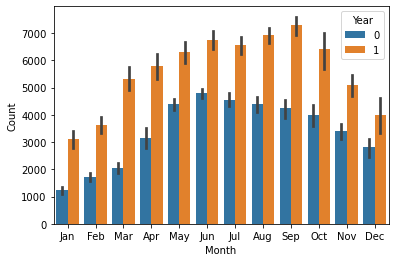

In [247]:
sns.barplot('Month','Count', hue='Year', data=data)
plt.show()

As it can be clearly seen , Bike sharing is more for every month of 2019, compared to 2018.

### 2) Holiday

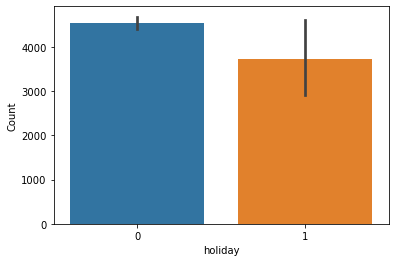

In [248]:
sns.barplot('holiday','Count', data=data)
plt.show()

As it can be seen, the bike sharing sales is more on non holidays.

### 3) Weekday

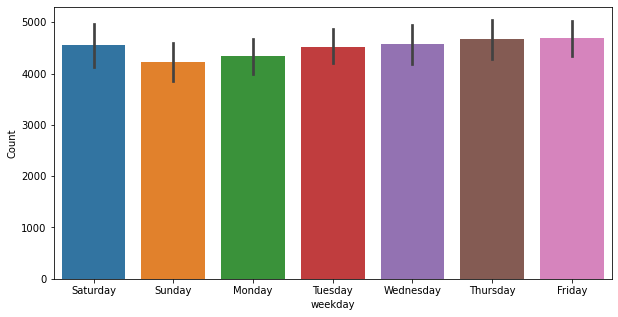

In [249]:
plt.figure(figsize=(10,5))
sns.barplot('weekday','Count', data=data)
plt.show()

As it can be seen the trend is increasing towards the end of the week.

### 4) Weather Situation (weathersit)

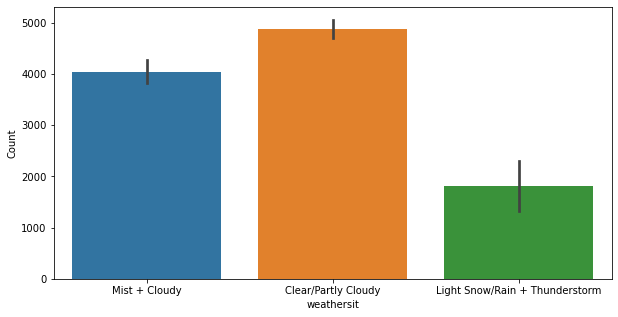

In [250]:
plt.figure(figsize=(10,5))
sns.barplot('weathersit','Count', data=data)
plt.show()

As it can be seen, on clear weather the bike sharing sales is more.

### 5) Seasons

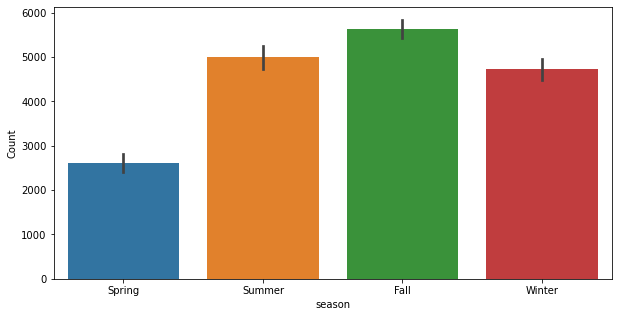

In [251]:
plt.figure(figsize=(10,5))
sns.barplot('season','Count', data=data)
plt.show()

As it can be seen, the sales is more in Fall Season

### 6) Temperature

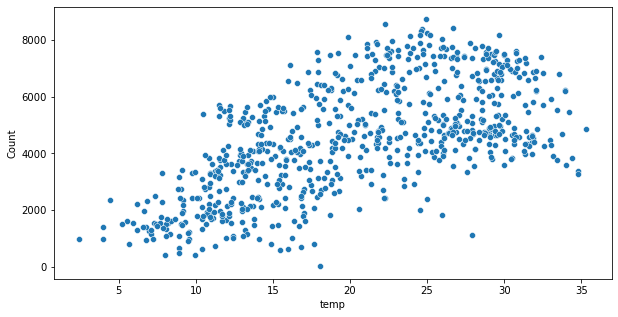

In [252]:
plt.figure(figsize=(10,5))
sns.scatterplot('temp','Count', data=data)
plt.show()

Sales are observed higher on high temperatures

In [253]:
data.columns

Index(['instant', 'dteday', 'season', 'Year', 'Month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'Humidity', 'windspeed',
       'casual', 'registered', 'Count'],
      dtype='object')

## Finding Correlation Using Heatmap:-

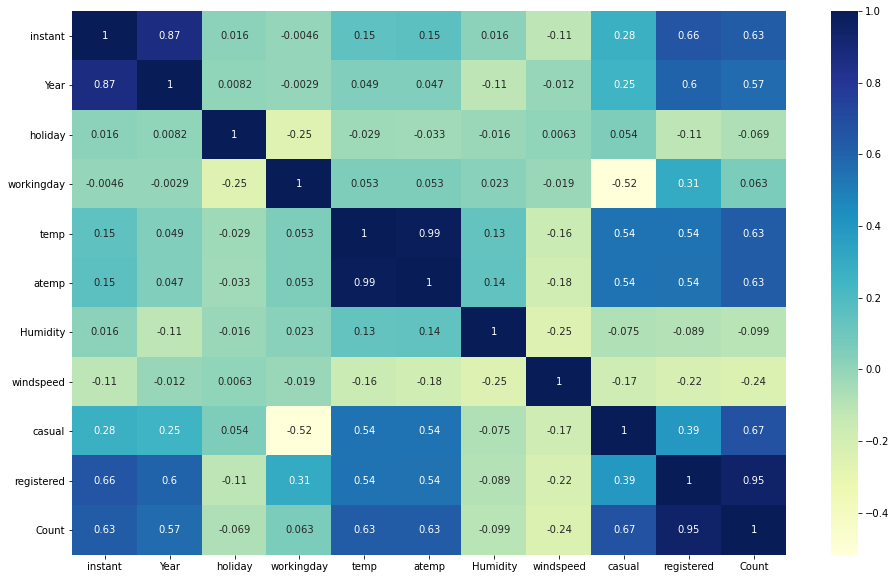

In [254]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### One Hot Encoding/Dummy Variables

The variable seasons, weathersit, Month and Weekdays are nominal variable. so we will convert it using one hot encoding or dummy variables method.


In [255]:
months = pd.get_dummies(data['Month'], drop_first=True)
weather = pd.get_dummies(data['weathersit'], drop_first=True)
season = pd.get_dummies(data['season'], drop_first=True)
weekday = pd.get_dummies(data['weekday'], drop_first=True)

In [256]:
data = pd.concat([data,months,weather,season,weekday], axis=1)
data.columns

Index(['instant', 'dteday', 'season', 'Year', 'Month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'Humidity', 'windspeed',
       'casual', 'registered', 'Count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Light Snow/Rain + Thunderstorm', 'Mist + Cloudy', 'Spring', 'Summer',
       'Winter', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Removing all unecessary Columns

Removing these columns based on business understanding.

In [257]:
data = data.drop(['instant', 'dteday', 'season', 'Month', 'weathersit', 'weekday', 'casual', 'registered'], axis=1)
data.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,Aug,Dec,...,Mist + Cloudy,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,0,0,1


# Splitting the data into Train and Test Dataset

In [290]:
data_train, data_test= train_test_split(data, train_size=0.7, random_state=100)

In [291]:
data_train.shape

(510, 30)

In [292]:
data_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,Aug,Dec,...,Mist + Cloudy,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,1,0,0,1,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,1,0,0,0,0,0,0,0


In [293]:
data_test.shape

(220, 30)

### Scaling the features

We will rescale the numerical features so that we can have all the data on the same scale

In [294]:
data_train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light Snow/Rain + Thunderstorm',
       'Mist + Cloudy', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [295]:
# We will use min max scaler as it is more robust than standarization and it bring vaues betwwen 0 & 1

num_var = ['temp', 'atemp', 'windspeed', 'Humidity', 'Count']
scaler = MinMaxScaler()
data_train[num_var] = scaler.fit_transform(data_train[num_var])
data_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,Aug,Dec,...,Mist + Cloudy,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,1,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,1,0,0,0,0,0,0,0


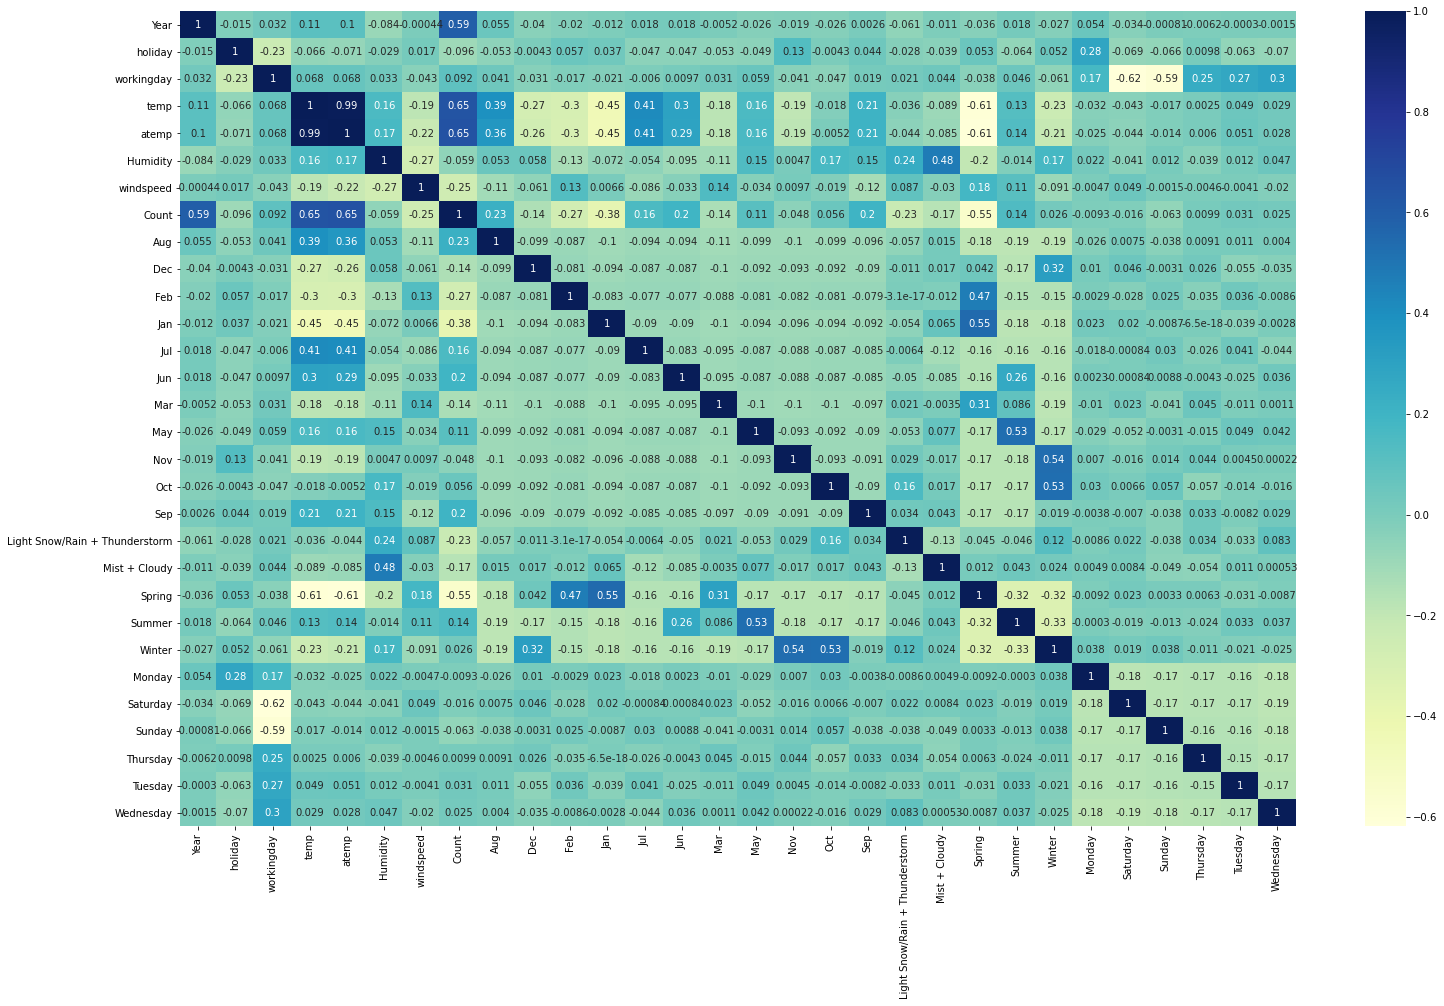

In [296]:
plt.figure(figsize = (25, 15))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the heatmap it can be observed that temp and year are highly correlated to Count. Even August and September are highly correlated

### Dividing the training data in X and Y

In [297]:
y_train = data_train.pop('Count')
X_train = data_train

# Building a Linear Model

We will be using sikit learn's Linear Regression Model with RFE

In [298]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [299]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [300]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 6),
 ('Feb', False, 12),
 ('Jan', False, 2),
 ('Jul', False, 14),
 ('Jun', False, 5),
 ('Mar', False, 15),
 ('May', False, 3),
 ('Nov', False, 7),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Light Snow/Rain + Thunderstorm', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', False, 4),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Monday', False, 13),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 9)]

In [301]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed', 'Aug',
       'Oct', 'Sep', 'Light Snow/Rain + Thunderstorm', 'Mist + Cloudy',
       'Summer', 'Winter', 'Saturday', 'Sunday'],
      dtype='object')

In [302]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Spring', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

###  Building a model using statsmodel for detail stats

In [303]:
X_train_rfe = X_train[col]

In [304]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [305]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [306]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.70e-192
Time:                        12:23:22   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1640      0.022      7.507      0.000       0.121       0.207
Year                               0.2292      0.008     28.712      0.000       0.214       0.245
holiday                           -0.0250      0.021     -1.205      0.229      -0.066       0.016
workingday                         0.0749      0.009      8.548      0.000       0.058       0.092
temp                               0.5309      0.022     24.146      0.000       0.488       0.574
Humidity                          -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed                         -0.1858      0.025     -7.353      0.000      -0.235      -0.136
Aug                                0.0557      0.016      3.457      0.001       0.024       0.087
Oct                                0.0385      0.017      2.230      0.026       0.005       0.072
Sep                                0.1252      0.016      7.757      0.000       0.093       0.157
Light Snow/Rain + Thunderstorm    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
Mist + Cloudy                     -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Summer                             0.1049      0.011      9.778      0.000       0.084       0.126
Winter                             0.1349      0.012     11.306      0.000       0.111       0.158
Saturday                           0.0834      0.011      7.657      0.000       0.062       0.105
Sunday                             0.0307      0.012      2.670      0.008       0.008       0.053
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     2.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking the VIF Values of correlation

In [307]:
X_train_rfe = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,31.45
13,Saturday,7.77
14,Sunday,7.65
1,holiday,2.14
4,Humidity,1.87
12,Winter,1.71
3,temp,1.59
10,Mist + Cloudy,1.56
7,Oct,1.49
6,Aug,1.46


There is a high Collinearity for workingday variable. So removing that.

In [308]:
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

Rebuilding the model using statsmodel for detailed stats

In [309]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.70e-192
Time:                        12:23:22   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2389      0.027      8.907      0.000       0.186       0.292
Year                               0.2292      0.008     28.712      0.000       0.214       0.245
holiday                           -0.0999      0.025     -3.942      0.000      -0.150      -0.050
temp                               0.5309      0.022     24.146      0.000       0.488       0.574
Humidity                          -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed                         -0.1858      0.025     -7.353      0.000      -0.235      -0.136
Aug                                0.0557      0.016      3.457      0.001       0.024       0.087
Oct                                0.0385      0.017      2.230      0.026       0.005       0.072
Sep                                0.1252      0.016      7.757      0.000       0.093       0.157
Light Snow/Rain + Thunderstorm    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
Mist + Cloudy                     -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Summer                             0.1049      0.011      9.778      0.000       0.084       0.126
Winter                             0.1349      0.012     11.306      0.000       0.111       0.158
Saturday                           0.0085      0.011      0.765      0.445      -0.013       0.030
Sunday                            -0.0442      0.012     -3.829      0.000      -0.067      -0.022
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As it can be observed that there are no variables with high p-values. Also removing the holiday parameter didn't affect the model performance. Lets check VIF if any correlation is still remaining.

In [310]:
X_train_lm = X_train_lm.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,14.75
2,temp,9.88
4,windspeed,3.65
11,Winter,2.25
9,Mist + Cloudy,2.16
0,Year,2.02
10,Summer,1.84
5,Aug,1.60
6,Oct,1.60
7,Sep,1.34


There is still high collinearity for Humidity variable. So removing those

In [311]:
X_train_lm = X_train_lm.drop(["Humidity"], axis = 1)

In [312]:
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.97e-188
Time:                        12:23:22   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1411      0.017      8.403      0.000       0.108       0.174
Year                               0.2331      0.008     28.769      0.000       0.217       0.249
holiday                           -0.1014      0.026     -3.924      0.000      -0.152      -0.051
temp                               0.5106      0.022     23.229      0.000       0.467       0.554
windspeed                         -0.1530      0.025     -6.183      0.000      -0.202      -0.104
Aug                                0.0539      0.016      3.281      0.001       0.022       0.086
Oct                                0.0343      0.018      1.950      0.052      -0.000       0.069
Sep                                0.1185      0.016      7.226      0.000       0.086       0.151
Light Snow/Rain + Thunderstorm    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
Mist + Cloudy                     -0.0840      0.009     -9.676      0.000      -0.101      -0.067
Summer                             0.1019      0.011      9.325      0.000       0.080       0.123
Winter                             0.1267      0.012     10.524      0.000       0.103       0.150
Saturday                           0.0105      0.011      0.926      0.355      -0.012       0.033
Sunday                            -0.0473      0.012     -4.026      0.000      -0.070      -0.024
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
X_train_new = X_train_lm.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,3.22
0,Year,2.01
10,Winter,1.94
9,Summer,1.83
4,Aug,1.60
5,Oct,1.59
8,Mist + Cloudy,1.49
6,Sep,1.34
11,Saturday,1.22


Lets Check by removing temp variable and see the model performance

In [314]:
X_train_new1 = X_train_new.drop(["temp"], axis = 1)
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train, X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     83.32
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.16e-110
Time:                        12:23:22   Log-Likelihood:                 320.04
No. Observations:                 510   AIC:                            -614.1
Df Residuals:                     497   BIC:                            -559.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.4133      0.017     23.822      0.000       0.379       0.447
Year                               0.2504      0.012     21.507      0.000       0.228       0.273
holiday                           -0.1273      0.037     -3.416      0.001      -0.201      -0.054
windspeed                         -0.2502      0.035     -7.108      0.000      -0.319      -0.181
Aug                                0.2212      0.021     10.366      0.000       0.179       0.263
Oct                                0.1125      0.025      4.516      0.000       0.064       0.161
Sep                                0.2430      0.022     10.863      0.000       0.199       0.287
Light Snow/Rain + Thunderstorm    -0.3064      0.035     -8.647      0.000      -0.376      -0.237
Mist + Cloudy                     -0.1145      0.012     -9.244      0.000      -0.139      -0.090
Summer                             0.1683      0.015     11.058      0.000       0.138       0.198
Winter                             0.0812      0.017      4.738      0.000       0.048       0.115
Saturday                           0.0011      0.016      0.070      0.944      -0.031       0.033
Sunday                            -0.0490      0.017     -2.890      0.004      -0.082      -0.016
==============================================================================
Omnibus:                        5.585   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                7.591
Skew:                          -0.015   Prob(JB):                       0.0225
Kurtosis:                       3.597   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As it can be seen from above model that the performance has dropped significantly. so we will keep the variable and our lm model is ready.

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [315]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

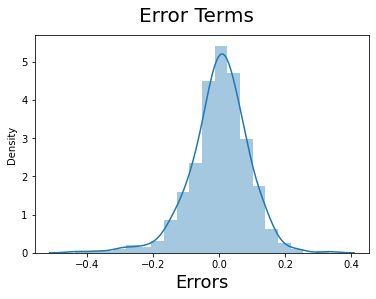

In [316]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It has normal distribution. Thus our assumptions holds true

## Making Predictions

#### Applying the scaling on the test sets

In [317]:
num_var

['temp', 'atemp', 'windspeed', 'Humidity', 'Count']

In [318]:
data_test[num_var] = scaler.transform(data_test[num_var])
data_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,Aug,Dec,...,Mist + Cloudy,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,1,0,0


In [319]:
#Dividing into X_test and y_test
y_test = data_test.pop('Count')
X_test = data_test
X_test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Aug,Dec,Feb,...,Mist + Cloudy,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.059091,0.086364,0.100000,...,0.318182,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.236333,0.281541,0.300684,...,0.466833,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [320]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

In [321]:
r2_score(y_test,y_pred)

0.8033896464243276

r2 score is 80.33 % which is acceptable for the test data. So our model is acceptable

Text(0, 0.5, 'y_pred')

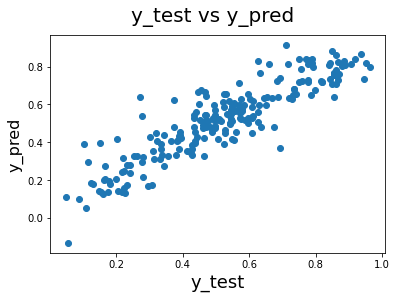

In [322]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line developed by Model is:

$ Count = 0.1411 + ( 0.2331  \times  Year - 0.1014  \times  holiday + 0.5106 \times temp - 0.1530 \times windspeed + 0.0539  \times Aug + 0.0343 \times Oct + 0.1185 \times Sep - 0.2929 \times Light Snow/(Rain + Thunderstorm) - 0.0840 \times (Misty + Cloud) + 0.1019 \times Summer + 0.1267 \times Winter + 0.0105 \times Saturday - 0.0473 \times Sunday ) $

An R-Squared value of 0.8033 on the test data signifies that the model is a very good predictor and 80.33% of the variance is captured by the model.It can be further improved by using other regression techniques.

Here it can be seen that on days with high temperature, the company should increase their bike availabilty as there is high high chance of increasein booking. Similarly we can see a reduce in booking on bad weather days such as snowy or rainy days, for those days they can put up some offers to attract people and increase booking. 